In [1]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parameters
start = dt.datetime(1928,1,1)
end = dt.datetime.now()
dow = '^GSPC'

In [3]:
# pull data back for specific stock, using Yahoo API, in specific date range
dow_df = yf.download(dow, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
dow_df['Date'] = dow_df.index

In [5]:
dow_df[['Date']] = dow_df[['Date']].apply(pd.to_datetime)

In [6]:
dow_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [7]:
dow_df.head()

,Close,Date
Date,,
1928-01-03,17.760000,1928-01-03
1928-01-04,17.719999,1928-01-04
1928-01-05,17.549999,1928-01-05
1928-01-06,17.660000,1928-01-06
1928-01-09,17.500000,1928-01-09


In [8]:
dow_df['Month_Year'] = pd.to_datetime(dow_df['Date']).dt.to_period('M')
dow_df['Day'] = pd.DatetimeIndex(dow_df['Date']).day

In [9]:
dow_df['Min_Date'] = (dow_df.groupby(dow_df['Month_Year'])
                          ['Day'].transform('min')
                       )

In [10]:
dow_df['Max_Date'] = (dow_df.groupby(dow_df['Month_Year'])
                          ['Day'].transform('max')
                       )

In [11]:
dow_df['Start_Month'] = np.where(dow_df['Day']== dow_df['Min_Date'], dow_df['Close'], False)
dow_df['End_Month'] = np.where(dow_df['Day']== dow_df['Max_Date'], dow_df['Close'], False)

In [12]:
min_dow_df = dow_df[dow_df['Start_Month']>0]

In [13]:
max_dow_df = dow_df[dow_df['End_Month']>0]

In [14]:
min_dow_df.drop(['Close', 'Day', 'Min_Date', 'Max_Date', 'End_Month'], axis= 1, inplace = True)
max_dow_df.drop(['Close', 'Day', 'Min_Date', 'Max_Date', 'Start_Month'], axis= 1, inplace = True)
dow_df = pd.merge(min_dow_df, max_dow_df, left_on = ['Month_Year'], right_on = ['Month_Year'])

C:\Users\e20789\AppData\Local\Temp\ipykernel_16428\3338186253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_dow_df.drop(['Close', 'Day', 'Min_Date', 'Max_Date', 'End_Month'], axis= 1, inplace = True)
C:\Users\e20789\AppData\Local\Temp\ipykernel_16428\3338186253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_dow_df.drop(['Close', 'Day', 'Min_Date', 'Max_Date', 'Start_Month'], axis= 1, inplace = True)


In [15]:
dow_df['DOW_%_Change'] = ((dow_df['End_Month'] - dow_df['Start_Month']) / dow_df['Start_Month'])* 100

In [16]:
dow_df['DOW_1mo_Moving_%Change'] = dow_df['DOW_%_Change'].rolling(12).mean()

In [17]:
dow_df['DOW_12mo_%_Change'] = dow_df['End_Month'].pct_change(periods=12)

In [18]:
dow_df['DOW_12mo_%_Change'] = dow_df['DOW_12mo_%_Change']*100

In [19]:
dow_df['DOW_12mo__%Change_Rolling'] = dow_df['DOW_12mo_%_Change'].rolling(12).mean()

In [20]:
dow_df.dropna(inplace=True)

In [21]:
dow_df.drop(['Date_y'], axis = 1, inplace = True)

In [22]:
dow_df.head()

,Date_x,Month_Year,Start_Month,End_Month,DOW_%_Change,DOW_1mo_Moving_%Change,DOW_12mo_%_Change,DOW_12mo__%Change_Rolling
23,1929-12-02,1929-12,20.950001,21.450001,2.386635,-0.659709,-11.909649,29.563978
24,1930-01-02,1930-01,21.180000,22.790001,7.601514,-0.338624,-11.460757,24.733939
25,1930-02-03,1930-02,22.740000,23.280001,2.374674,-0.060110,-9.026962,19.959869
26,1930-03-03,1930-03,23.360001,24.150000,3.381845,0.318497,-5.405409,16.808000
27,1930-04-01,1930-04,25.370001,24.900000,-1.852587,-0.190923,-4.009256,13.862081


In [23]:
date = dow_df["Date_x"]
value = dow_df["DOW_12mo__%Change_Rolling"]

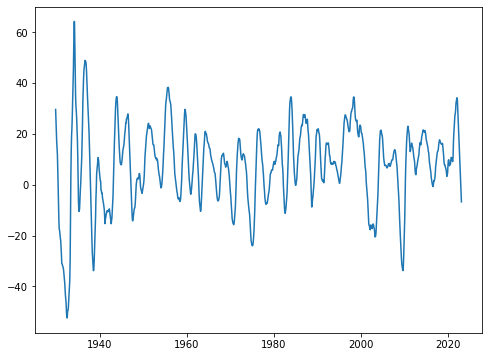

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, value);

<AxesSubplot:>

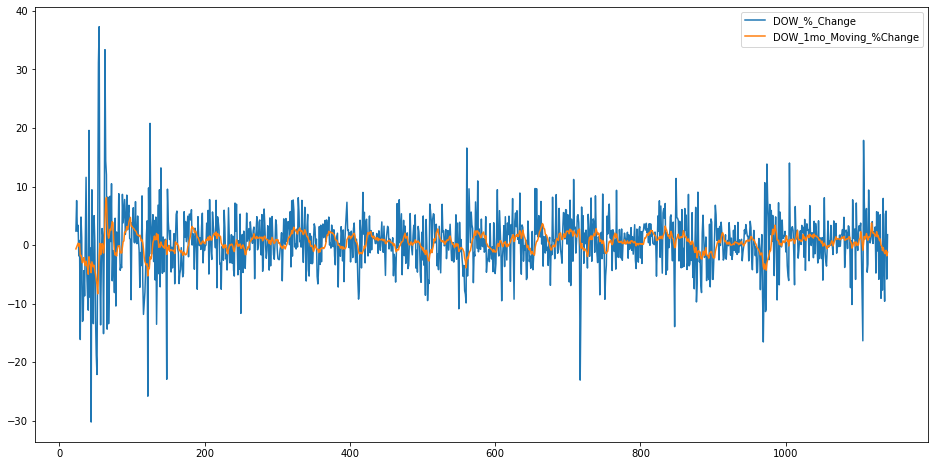

In [25]:
dow_df[['DOW_%_Change', 'DOW_1mo_Moving_%Change']].plot(label='DOW_Jones',
                                  figsize=(16, 8))

<AxesSubplot:>

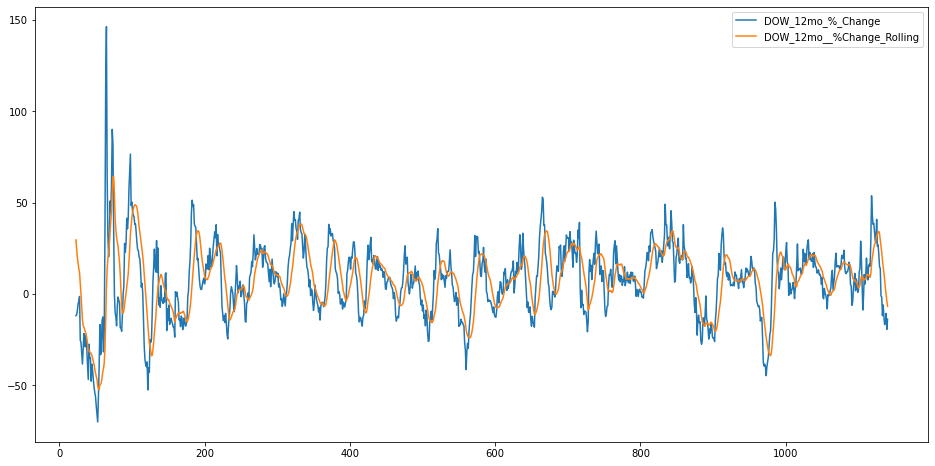

In [26]:
dow_df[['DOW_12mo_%_Change', 'DOW_12mo__%Change_Rolling']].plot(label='DOW_Jones',
                                  figsize=(16, 8))